In [138]:
# Import our libraries we are going to use for our data analysis.
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Plotly visualizations
from plotly import tools
import plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
# plotly.tools.set_credentials_file(username='AlexanderBach', api_key='o4fx6i1MtEIJQxfWYvU1')


# For oversampling Library (Dealing with Imbalanced Datasets)
from imblearn.over_sampling import SMOTE
from collections import Counter

# Other Libraries
import time



df = pd.read_csv('loan.csv', low_memory=False)

# Copy of the dataframe
original_df = df.copy()

df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 114 entries, id to total_il_high_credit_limit
dtypes: float64(75), int64(13), object(26)
memory usage: 34.5+ MB


In [140]:
df = df.rename(columns={"loan_amnt": "loan_amount", "funded_amnt": "funded_amount", "funded_amnt_inv": "investor_funds",
                       "int_rate": "interest_rate", "annual_inc": "annual_income"})

# Drop irrelevant columns
df.drop(['id', 'member_id', 'emp_title', 'url', 'desc', 'zip_code', 'title'], axis=1, inplace=True)

C:\Users\Kave\AppData\Local\Temp\ipykernel_17256\4270265972.py:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\Kave\AppData\Local\Temp\ipykernel_17256\4270265972.py:9: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\Kave\AppData\Local\Temp\ipykernel_17256\4270265972.py:11: UserWarning:



`distplot` is a

Text(0.5, 1.0, 'Total committed by Investors')

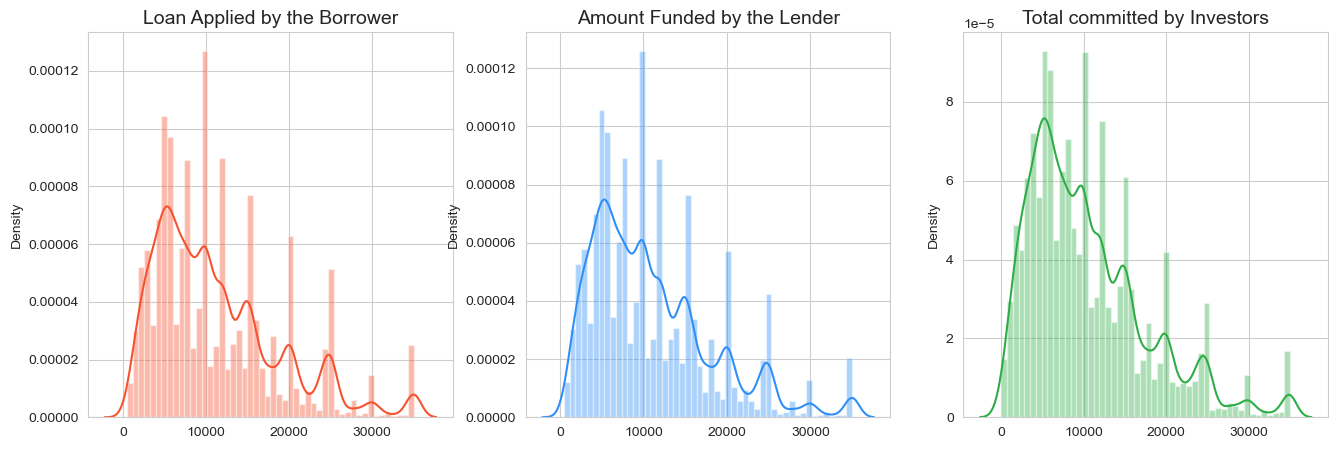

In [141]:
fig, ax = plt.subplots(1, 3, figsize=(16,5))

loan_amount = df["loan_amount"].values
funded_amount = df["funded_amount"].values
investor_funds = df["investor_funds"].values

sns.distplot(loan_amount, ax=ax[0], color="#F7522F")
ax[0].set_title("Loan Applied by the Borrower", fontsize=14)
sns.distplot(funded_amount, ax=ax[1], color="#2F8FF7")
ax[1].set_title("Amount Funded by the Lender", fontsize=14)
sns.distplot(investor_funds, ax=ax[2], color="#2EAD46")
ax[2].set_title("Total committed by Investors", fontsize=14)

In [142]:
missing_values = df['issue_d'].isnull().sum()
if missing_values > 0:
    # Handle missing values if necessary
    df['issue_d'] = df['issue_d'].fillna('')  # Replace NaN values with empty strings or appropriate handling

# Parse 'issue_d' column into datetime format with specified format
try:
    df['issue_date'] = pd.to_datetime(df['issue_d'], format='%b-%y')
except ValueError:
    print("Error: Unable to parse 'issue_d' column. Check for invalid datetime formats.")

# Extract year from datetime and create 'year' column
try:
    df['year'] = df['issue_date'].dt.year
except KeyError:
    print("Error: 'issue_date' column not found. Make sure datetime parsing was successful.")

# Display the transformed DataFrame with 'year' column
print(df[['issue_d', 'year']].head())

  issue_d  year
0  Dec-11  2011
1  Dec-11  2011
2  Dec-11  2011
3  Dec-11  2011
4  Dec-11  2011


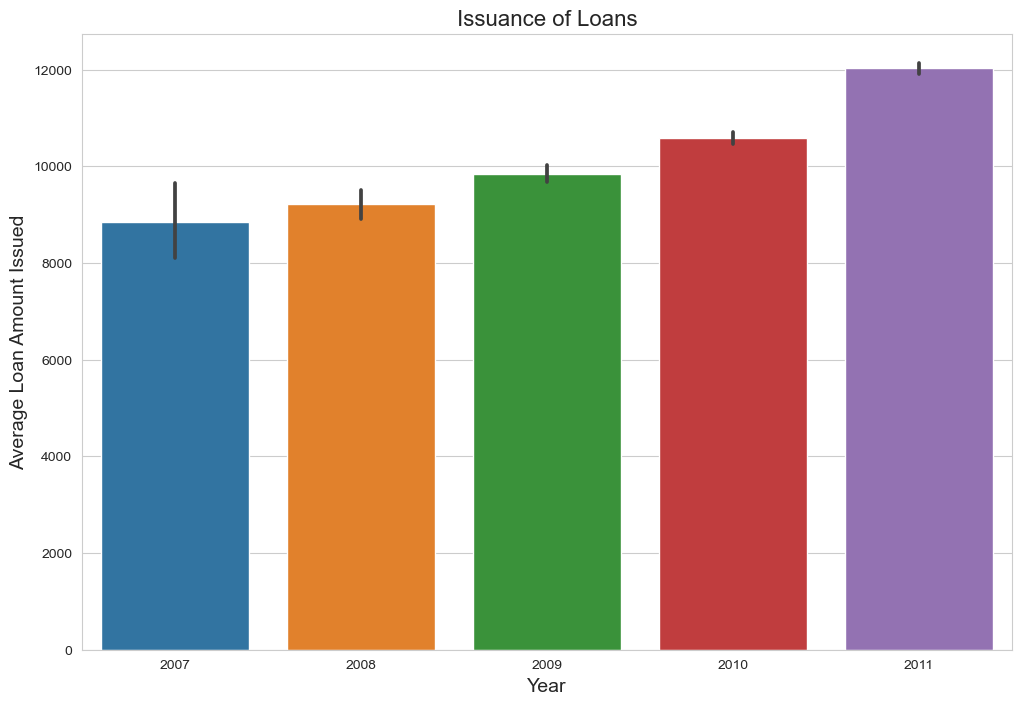

In [143]:
plt.figure(figsize=(12, 8))

# Use seaborn's barplot to visualize the average loan amount per year
sns.barplot(x='year', y='loan_amount', data=df, palette='tab10')

# Set plot title and axis labels
plt.title('Issuance of Loans', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Loan Amount Issued', fontsize=14)

# Show the plot
plt.show()

In [144]:
df["loan_status"].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

In [145]:

bad_loan = ["Charged Off", "Default", "Does not meet the credit policy. Status:Charged Off", "In Grace Period", 
            "Late (16-30 days)", "Late (31-120 days)"]


df['loan_condition'] = np.nan

def loan_condition(status):
    if status in bad_loan:
        return 'Bad Loan'
    else:
        return 'Good Loan'
    
    
df['loan_condition'] = df['loan_status'].apply(loan_condition)

[Text(0, 0.5, '(%)')]

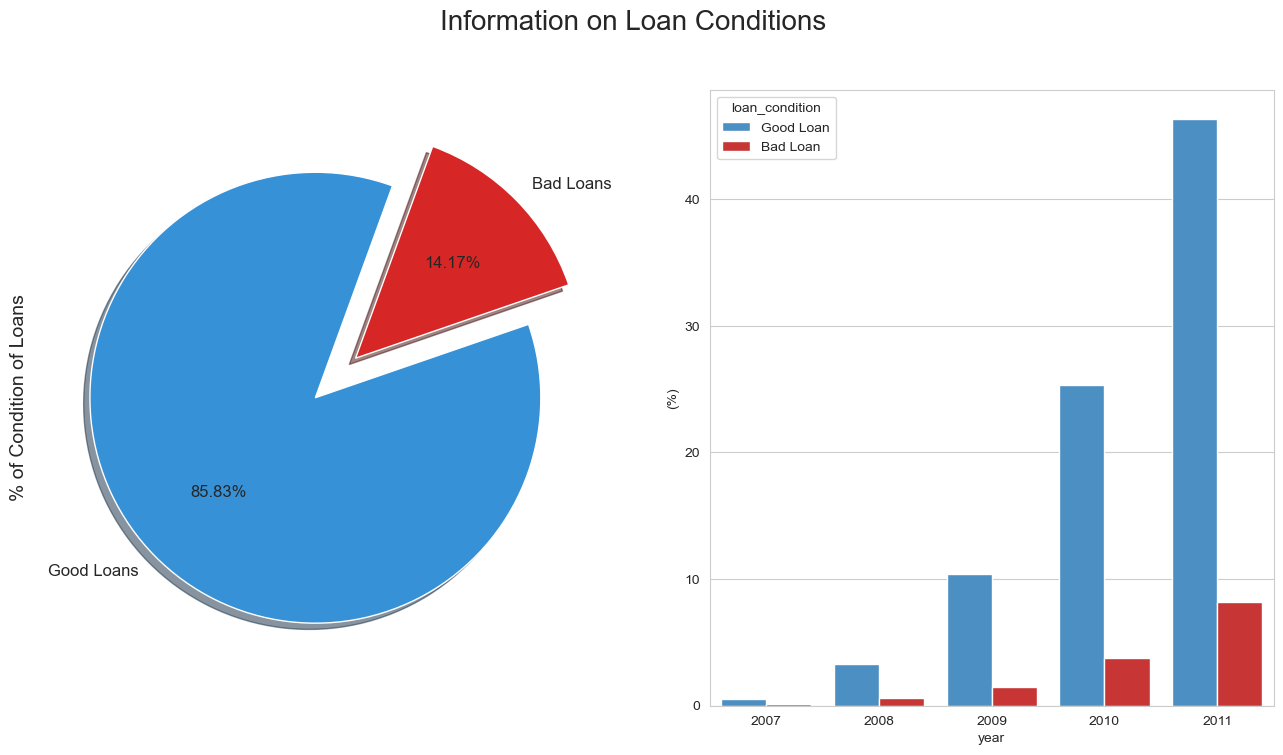

In [146]:
f, ax = plt.subplots(1,2, figsize=(16,8))

colors = ["#3791D7", "#D72626"]
labels ="Good Loans", "Bad Loans"

plt.suptitle('Information on Loan Conditions', fontsize=20)

df["loan_condition"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=70)


# ax[0].set_title('State of Loan', fontsize=16)
ax[0].set_ylabel('% of Condition of Loans', fontsize=14)

# sns.countplot('loan_condition', data=df, ax=ax[1], palette=colors)
# ax[1].set_title('Condition of Loans', fontsize=20)
# ax[1].set_xticklabels(['Good', 'Bad'], rotation='horizontal')
palette = ["#3791D7", "#E01E1B"]

sns.barplot(x="year", y="loan_amount", hue="loan_condition", data=df, palette=palette, estimator=lambda x: len(x) / len(df) * 100)
ax[1].set(ylabel="(%)")

In [147]:
df['addr_state'].unique()

# Make a list with each of the regions by state.

west = ['CA', 'OR', 'UT','WA', 'CO', 'NV', 'AK', 'MT', 'HI', 'WY', 'ID']
south_west = ['AZ', 'TX', 'NM', 'OK']
south_east = ['GA', 'NC', 'VA', 'FL', 'KY', 'SC', 'LA', 'AL', 'WV', 'DC', 'AR', 'DE', 'MS', 'TN' ]
mid_west = ['IL', 'MO', 'MN', 'OH', 'WI', 'KS', 'MI', 'SD', 'IA', 'NE', 'IN', 'ND']
north_east = ['CT', 'NY', 'PA', 'NJ', 'RI','MA', 'MD', 'VT', 'NH', 'ME']



df['region'] = np.nan

def finding_regions(state):
    if state in west:
        return 'West'
    elif state in south_west:
        return 'SouthWest'
    elif state in south_east:
        return 'SouthEast'
    elif state in mid_west:
        return 'MidWest'
    elif state in north_east:
        return 'NorthEast'
    


df['region'] = df['addr_state'].apply(finding_regions)

In [148]:
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%y', errors='coerce')

# Check for any NaT (Not a Time) values resulting from parsing errors
invalid_dates = df[df['issue_d'].isnull()]['issue_d']
if not invalid_dates.empty:
    print(f"Invalid date strings found:\n{invalid_dates}")

# Proceed with extracting year and month from 'issue_d' to use for grouping
df['issue_year'] = df['issue_d'].dt.year  # Extract year
df['issue_month'] = df['issue_d'].dt.month  # Extract month

# Group by 'issue_year' and 'region', then sum up 'loan_amount'
grouped_yearly = df.groupby(['issue_year', 'region'], as_index=False)['loan_amount'].sum()

# Optionally, if you want to group by month as well
grouped_monthly = df.groupby(['issue_month', 'region'], as_index=False)['loan_amount'].sum()

# If you prefer to work with a DataFrame containing only relevant columns
df_dates = pd.DataFrame(data=grouped_yearly[['issue_year', 'region', 'loan_amount']])

# Convert loan_amount to thousands for better readability
df_dates['loan_amount'] = df_dates['loan_amount'] / 1000

# Display or use the resulting DataFrame as needed
print(df_dates)

    issue_year     region  loan_amount
0         2007    MidWest      249.450
1         2007  NorthEast      900.550
2         2007  SouthEast      720.900
3         2007  SouthWest       81.800
4         2007       West      266.575
5         2008    MidWest     1903.025
6         2008  NorthEast     3437.950
7         2008  SouthEast     2993.600
8         2008  SouthWest     1697.175
9         2008       West     4358.525
10        2009    MidWest     6561.225
11        2009  NorthEast    13216.800
12        2009  SouthEast     9372.000
13        2009  SouthWest     4963.625
14        2009       West    12322.675
15        2010    MidWest    16215.250
16        2010  NorthEast    35704.925
17        2010  SouthEast    25376.525
18        2010  SouthWest    12721.925
19        2010       West    32031.575
20        2011    MidWest    36666.600
21        2011  NorthEast    68138.675
22        2011  SouthEast    60580.600
23        2011  SouthWest    27424.300
24        2011       West

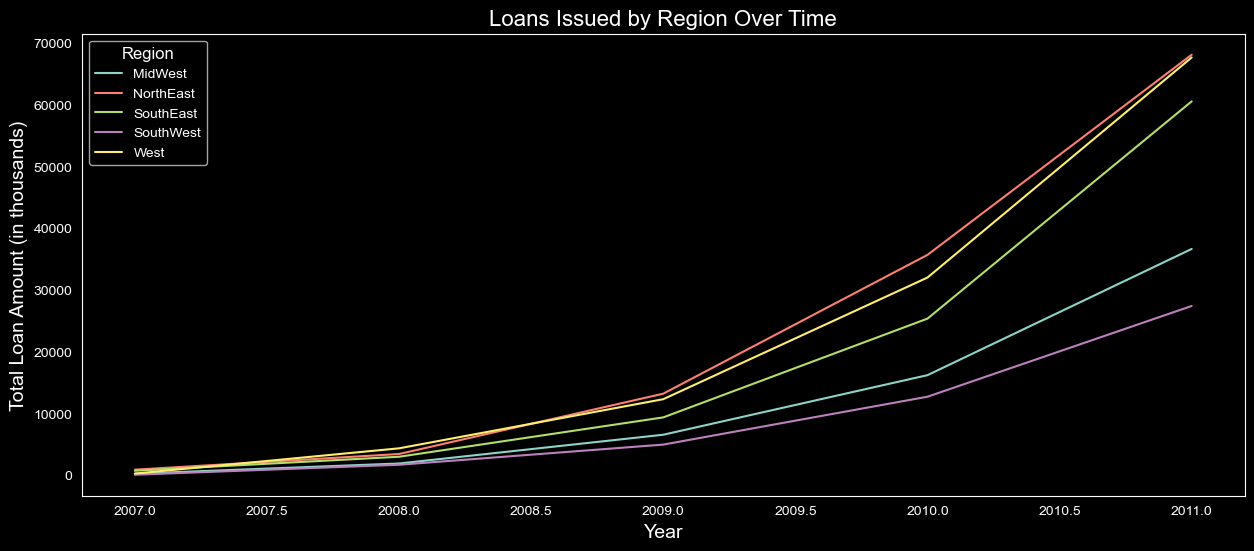

In [149]:
plt.style.use('dark_background')
cmap = plt.cm.Set3

# Group by 'issue_year' and 'region', summing loan_amount
by_issued_amount = df_dates.groupby(['issue_year', 'region'])['loan_amount'].sum()

# Unstack to pivot 'region' as columns for plotting
by_issued_amount.unstack().plot(kind='line', colormap=cmap, figsize=(15, 6))

plt.title('Loans Issued by Region Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Loan Amount (in thousands)', fontsize=14)
plt.legend(title='Region', title_fontsize='large', fontsize='medium', loc='upper left')
plt.grid(False)  # Disable grid

plt.show()

In [150]:
employment_length = ['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
                    '4 years', '5 years', '6 years', '2 years', '7 years', 'n/a']

# Create a new column and convert emp_length to integers.

lst = [df]
df['emp_length_int'] = np.nan

for col in lst:
    col.loc[col['emp_length'] == '10+ years', "emp_length_int"] = 10
    col.loc[col['emp_length'] == '9 years', "emp_length_int"] = 9
    col.loc[col['emp_length'] == '8 years', "emp_length_int"] = 8
    col.loc[col['emp_length'] == '7 years', "emp_length_int"] = 7
    col.loc[col['emp_length'] == '6 years', "emp_length_int"] = 6
    col.loc[col['emp_length'] == '5 years', "emp_length_int"] = 5
    col.loc[col['emp_length'] == '4 years', "emp_length_int"] = 4
    col.loc[col['emp_length'] == '3 years', "emp_length_int"] = 3
    col.loc[col['emp_length'] == '2 years', "emp_length_int"] = 2
    col.loc[col['emp_length'] == '1 year', "emp_length_int"] = 1
    col.loc[col['emp_length'] == '< 1 year', "emp_length_int"] = 0.5
    col.loc[col['emp_length'] == 'n/a', "emp_length_int"] = 0
    

[2011 2010 2009 2008 2007]
['SouthWest' 'SouthEast' 'MidWest' 'West' 'NorthEast']


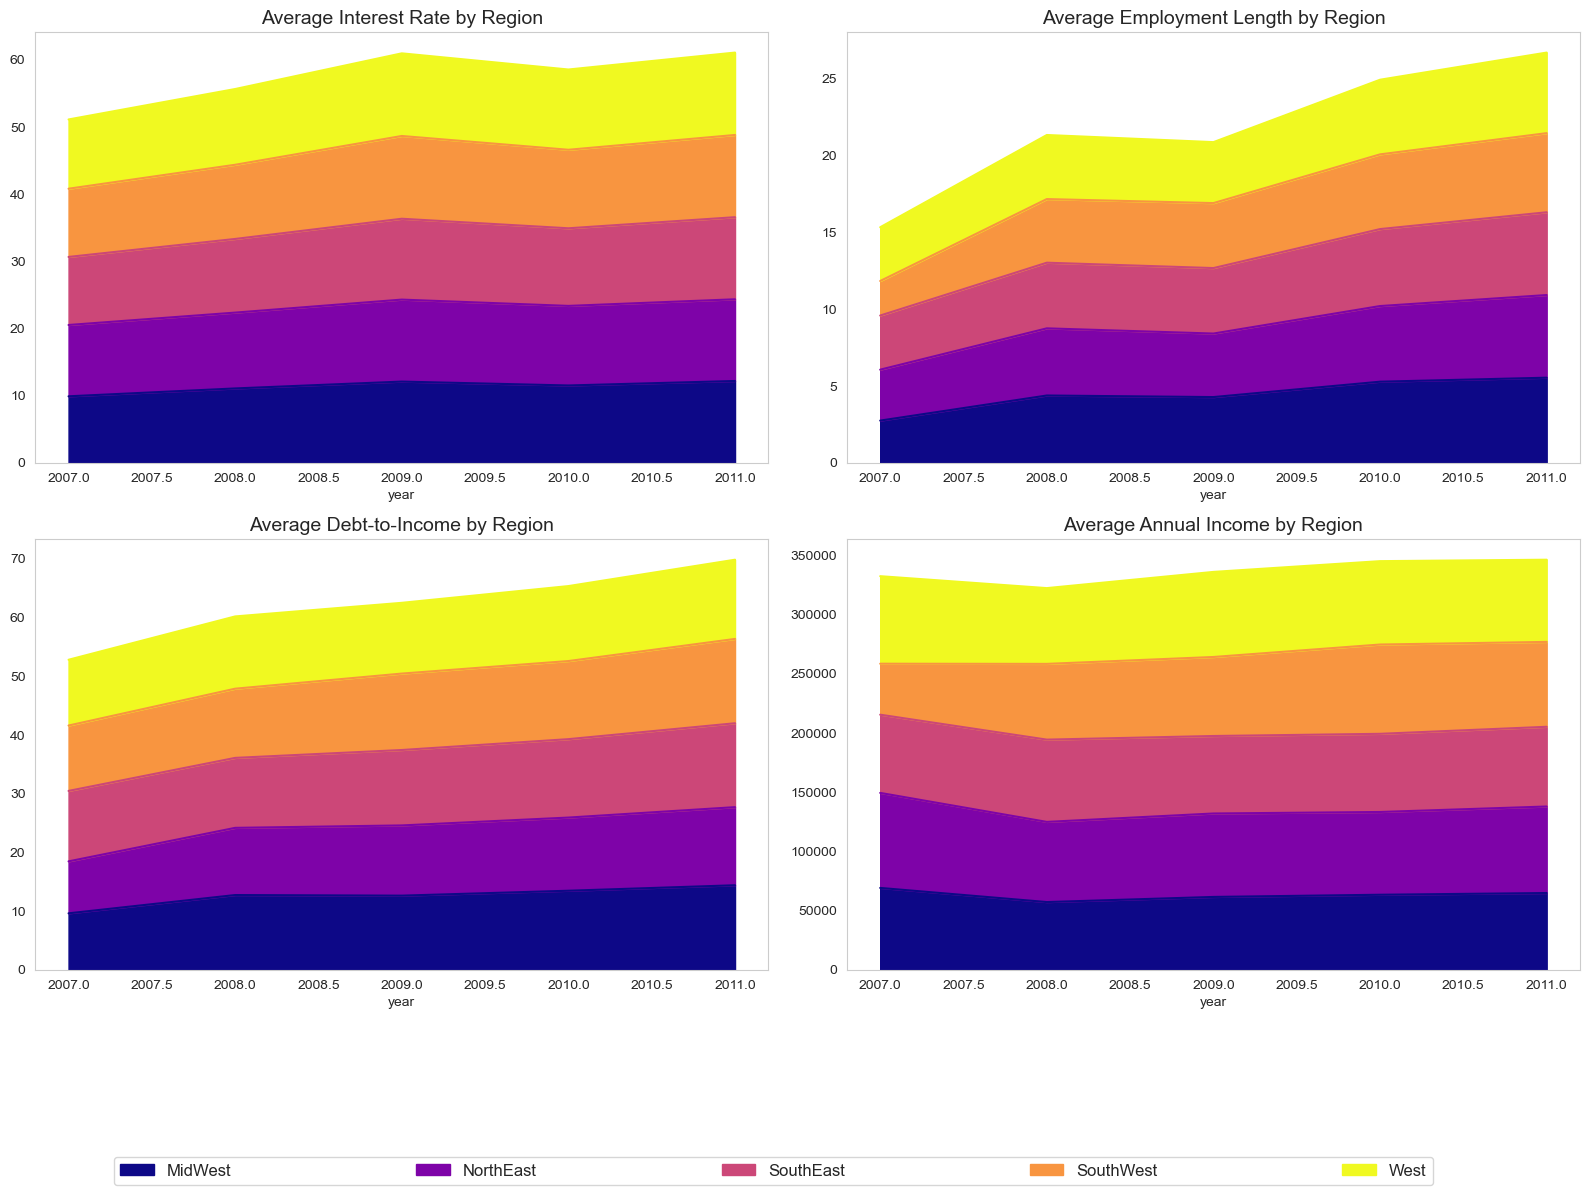

In [151]:
# Preprocess numeric columns
df['interest_rate'] = df['interest_rate'].replace('%', '', regex=True).astype(float)
df['emp_length_int'] = df['emp_length_int'].replace('%', '', regex=True).astype(float)
df['dti'] = df['dti'].replace('%', '', regex=True).astype(float)

# Set the annual_income column to numeric
df['annual_income'] = pd.to_numeric(df['annual_income'], errors='coerce')

# Verify grouping columns ('year' and 'region')
print(df['year'].unique())  # Ensure 'year' contains valid values
print(df['region'].unique())  # Ensure 'region' contains valid values

# Set seaborn style
sns.set_style('whitegrid')

# Create subplots
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Define colormap
cmap = plt.cm.plasma

# Plot average interest rate by region
by_interest_rate = df.groupby(['year', 'region'])['interest_rate'].mean()
by_interest_rate.unstack().plot(kind='area', stacked=True, colormap=cmap, grid=False, legend=False, ax=ax1)
ax1.set_title('Average Interest Rate by Region', fontsize=14)

# Plot average employment length by region
by_employment_length = df.groupby(['year', 'region'])['emp_length_int'].mean()
by_employment_length.unstack().plot(kind='area', stacked=True, colormap=cmap, grid=False, legend=False, ax=ax2)
ax2.set_title('Average Employment Length by Region', fontsize=14)

# Plot average debt-to-income by region
by_dti = df.groupby(['year', 'region'])['dti'].mean()
by_dti.unstack().plot(kind='area', stacked=True, colormap=cmap, grid=False, legend=False, ax=ax3)
ax3.set_title('Average Debt-to-Income by Region', fontsize=14)

# Plot average annual income by region
by_income = df.groupby(['year', 'region'])['annual_income'].mean()
by_income.unstack().plot(kind='area', stacked=True, colormap=cmap, grid=False, ax=ax4)
ax4.set_title('Average Annual Income by Region', fontsize=14)

# Adjust legend position and properties
ax4.legend(bbox_to_anchor=(-1.0, -0.5, 1.8, 0.1), loc='lower center', prop={'size': 12}, ncol=5, mode='expand', borderaxespad=0)

# Show plots
plt.tight_layout()
plt.show()

In [152]:
# Average interest rates clients pay
df['interest_rate'].mean()


12.021176574262908

In [153]:
# Average annual income of clients
df['annual_income'].mean()

68968.92637711811

In [154]:
# Plotting by states

# Grouping by our metrics
# First Plotly Graph (We evaluate the operative side of the business)
by_loan_amount = df.groupby(['region','addr_state'], as_index=False).loan_amount.sum()
by_interest_rate = df.groupby(['region', 'addr_state'], as_index=False).interest_rate.mean()
by_income = df.groupby(['region', 'addr_state'], as_index=False).annual_income.mean()

# Take the values to a list for visualization purposes.
states = by_loan_amount['addr_state'].values.tolist()
average_loan_amounts = by_loan_amount['loan_amount'].values.tolist()
average_interest_rates = by_interest_rate['interest_rate'].values.tolist()
average_annual_income = by_income['annual_income'].values.tolist()


from collections import OrderedDict

# Figure Number 1 (Perspective for the Business Operations)
metrics_data = OrderedDict([('state_codes', states),
                            ('issued_loans', average_loan_amounts),
                            ('interest_rate', average_interest_rates),
                            ('annual_income', average_annual_income)])
                     

metrics_df = pd.DataFrame.from_dict(metrics_data)
metrics_df = metrics_df.round(decimals=2)
metrics_df.head()




,state_codes,issued_loans,interest_rate,annual_income
0,IA,56450,8.97,50599.20
1,IL,17473900,12.03,69788.22
2,IN,86225,10.80,35416.11
3,KS,2952525,11.75,62481.15
4,MI,8085325,11.94,65325.80


In [155]:
import plotly  as py
import plotly.graph_objs as go


for col in metrics_df.columns:
    metrics_df[col] = metrics_df[col].astype(str)
    
scl = [[0.0, 'rgb(210, 241, 198)'],[0.2, 'rgb(188, 236, 169)'],[0.4, 'rgb(171, 235, 145)'],\
            [0.6, 'rgb(140, 227, 105)'],[0.8, 'rgb(105, 201, 67)'],[1.0, 'rgb(59, 159, 19)']]

metrics_df['text'] = metrics_df['state_codes'] + '<br>' +\
'Average loan interest rate: ' + metrics_df['interest_rate'] + '<br>'+\
'Average annual income: ' + metrics_df['annual_income'] 


data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = metrics_df['state_codes'],
        z = metrics_df['issued_loans'], 
        locationmode = 'USA-states',
        text = metrics_df['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "$s USD")
        ) ]


layout = dict(
    title = 'Lending Clubs Issued Loans <br> (A Perspective for the Business Operations)',
    geo = dict(
        scope = 'usa',
        projection=dict(type='albers usa'),
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)')
)

fig = dict(data=data, layout=layout)
iplot(fig, filename='d3-cloropleth-map')

In [156]:
# Let's create categories for annual_income since most of the bad loans are located below 100k

df['income_category'] = np.nan
lst = [df]

for col in lst:
    col.loc[col['annual_income'] <= 100000, 'income_category'] = 'Low'
    col.loc[(col['annual_income'] > 100000) & (col['annual_income'] <= 200000), 'income_category'] = 'Medium'
    col.loc[col['annual_income'] > 200000, 'income_category'] = 'High'

In [157]:
by_condition = df.groupby('addr_state')['loan_condition'].value_counts()/ df.groupby('addr_state')['loan_condition'].count()
by_emp_length = df.groupby(['region', 'addr_state'], as_index=False).emp_length_int.mean().sort_values(by="addr_state")

loan_condition_bystate = pd.crosstab(df['addr_state'], df['loan_condition'] )

cross_condition = pd.crosstab(df["addr_state"], df["loan_condition"])
# Percentage of condition of loan
percentage_loan_contributor = pd.crosstab(df['addr_state'], df['loan_condition']).apply(lambda x: x/x.sum() * 100)
condition_ratio = cross_condition["Bad Loan"]/cross_condition["Good Loan"]
by_dti = df.groupby(['region', 'addr_state'], as_index=False).dti.mean()
state_codes = sorted(states)

# Take to a list
default_ratio = condition_ratio.values.tolist()
average_dti = by_dti['dti'].values.tolist()
average_emp_length = by_emp_length["emp_length_int"].values.tolist()
number_of_badloans = loan_condition_bystate['Bad Loan'].values.tolist()
percentage_ofall_badloans = percentage_loan_contributor['Bad Loan'].values.tolist()


# Figure Number 2
risk_data = OrderedDict([('state_codes', state_codes),
                         ('default_ratio', default_ratio),
                         ('badloans_amount', number_of_badloans),
                         ('percentage_of_badloans', percentage_ofall_badloans),
                         ('average_dti', average_dti),
                         ('average_emp_length', average_emp_length)])


# Figure 2 Dataframe 
risk_df = pd.DataFrame.from_dict(risk_data)
risk_df = risk_df.round(decimals=3)
risk_df.head()

,state_codes,default_ratio,badloans_amount,percentage_of_badloans,average_dti,average_emp_length
0,AK,0.231,15,0.267,12.910,5.853
1,AL,0.136,54,0.960,13.274,5.381
2,AR,0.124,27,0.480,15.971,5.907
3,AZ,0.163,123,2.186,14.085,4.747
4,CA,0.188,1125,19.993,13.570,4.917


In [158]:
import plotly  as py
import plotly.graph_objs as go


for col in risk_df.columns:
    risk_df[col] = risk_df[col].astype(str)
    
scl = [[0.0, 'rgb(202, 202, 202)'],[0.2, 'rgb(253, 205, 200)'],[0.4, 'rgb(252, 169, 161)'],\
            [0.6, 'rgb(247, 121, 108  )'],[0.8, 'rgb(232, 70, 54)'],[1.0, 'rgb(212, 31, 13)']]

risk_df['text'] = risk_df['state_codes'] + '<br>' +\
'Number of Bad Loans: ' + risk_df['badloans_amount'] + '<br>' + \
'Percentage of all Bad Loans: ' + risk_df['percentage_of_badloans'] + '%' +  '<br>' + \
'Average Debt-to-Income Ratio: ' + risk_df['average_dti'] + '<br>'+\
'Average Length of Employment: ' + risk_df['average_emp_length'] 


data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = risk_df['state_codes'],
        z = risk_df['default_ratio'], 
        locationmode = 'USA-states',
        text = risk_df['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "%")
        ) ]


layout = dict(
    title = 'Lending Clubs Default Rates <br> (Analyzing Risks)',
    geo = dict(
        scope = 'usa',
        projection=dict(type='albers usa'),
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)')
)

fig = dict(data=data, layout=layout)
iplot(fig, filename='d3-cloropleth-map')

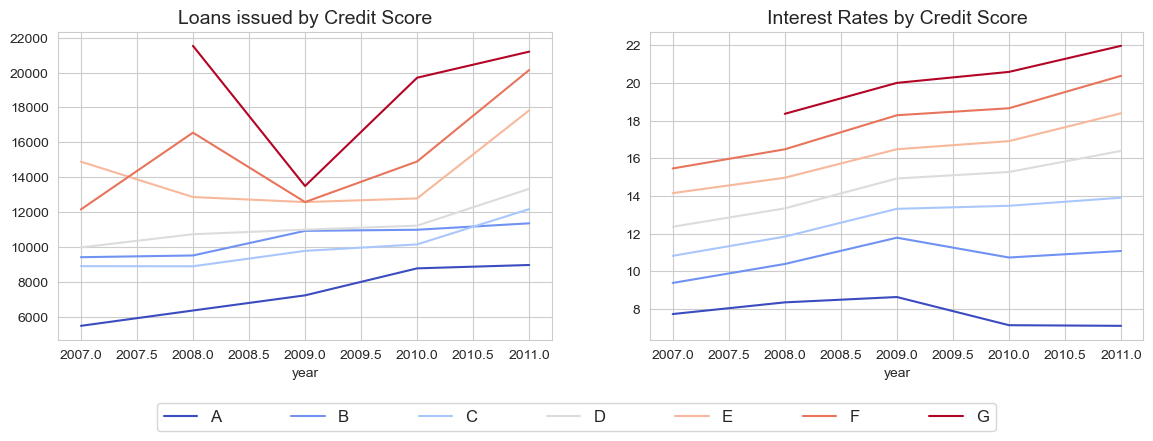

In [159]:
# Let's visualize how many loans were issued by creditscore
f, ((ax1, ax2)) = plt.subplots(1, 2)
cmap = plt.cm.coolwarm

by_credit_score = df.groupby(['year', 'grade']).loan_amount.mean()
by_credit_score.unstack().plot(legend=False, ax=ax1, figsize=(14, 4), colormap=cmap)
ax1.set_title('Loans issued by Credit Score', fontsize=14)
    
    
by_inc = df.groupby(['year', 'grade']).interest_rate.mean()
by_inc.unstack().plot(ax=ax2, figsize=(14, 4), colormap=cmap)
ax2.set_title('Interest Rates by Credit Score', fontsize=14)

ax2.legend(bbox_to_anchor=(-1.0, -0.3, 1.7, 0.1), loc=5, prop={'size':12},
           ncol=7, mode="expand", borderaxespad=0.)

Text(0, 0.5, 'Interest Rate (%)')

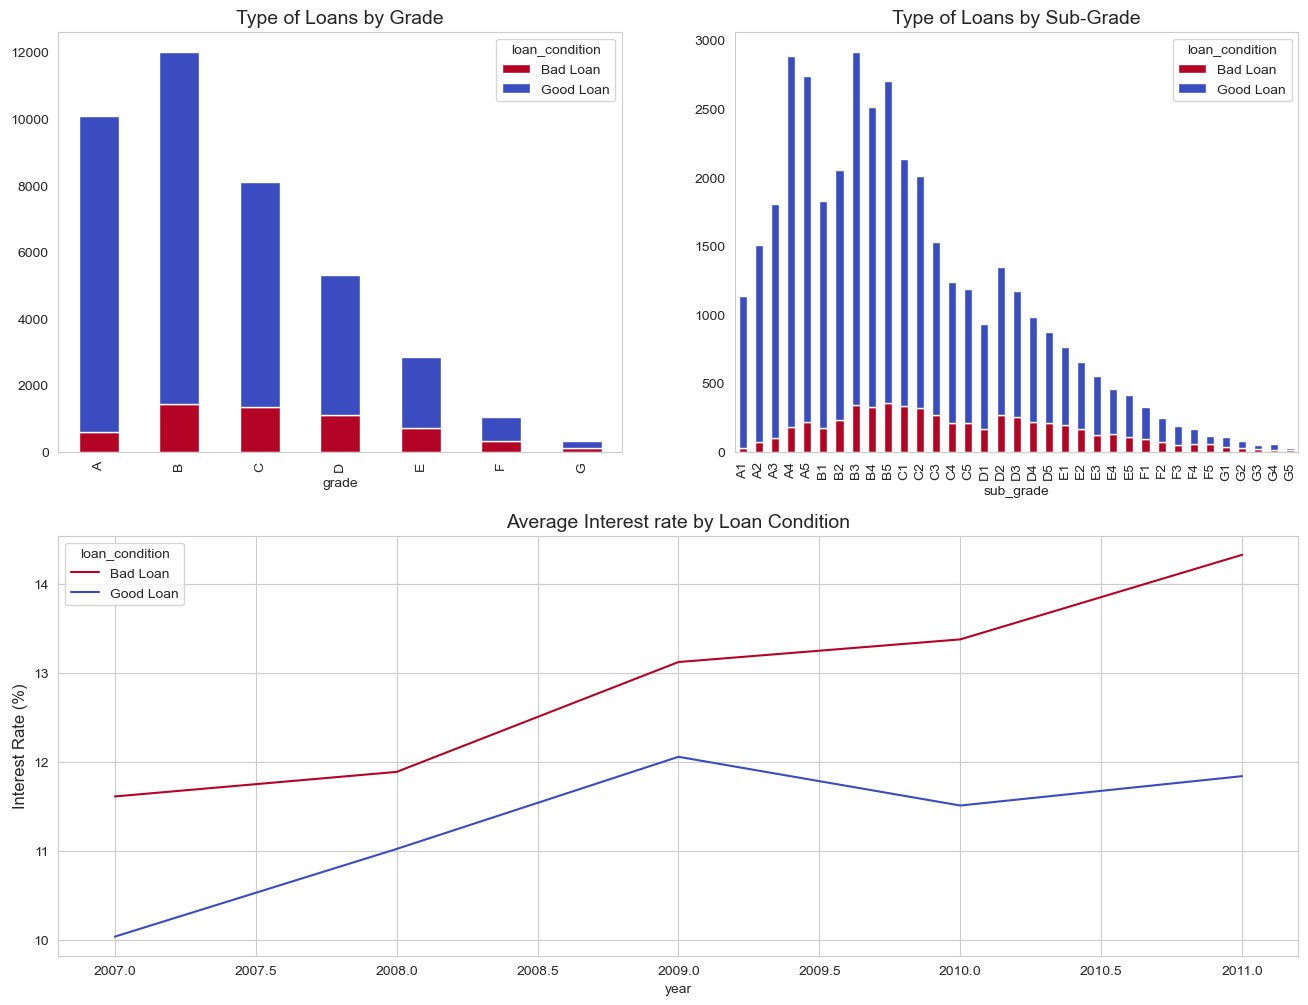

In [160]:
fig = plt.figure(figsize=(16,12))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(212)

cmap = plt.cm.coolwarm_r

loans_by_region = df.groupby(['grade', 'loan_condition']).size()
loans_by_region.unstack().plot(kind='bar', stacked=True, colormap=cmap, ax=ax1, grid=False)
ax1.set_title('Type of Loans by Grade', fontsize=14)


loans_by_grade = df.groupby(['sub_grade', 'loan_condition']).size()
loans_by_grade.unstack().plot(kind='bar', stacked=True, colormap=cmap, ax=ax2, grid=False)
ax2.set_title('Type of Loans by Sub-Grade', fontsize=14)

by_interest = df.groupby(['year', 'loan_condition']).interest_rate.mean()
by_interest.unstack().plot(ax=ax3, colormap=cmap)
ax3.set_title('Average Interest rate by Loan Condition', fontsize=14)
ax3.set_ylabel('Interest Rate (%)', fontsize=12)

In [161]:
# Just get me the numeric variables
numeric_variables = df.select_dtypes(exclude=["object"])

In [162]:
title = 'Bad Loans: Loan Statuses'

labels = bad_loan # All the elements that comprise a bad loan.

len(labels)
colors = ['rgba(236, 112, 99, 1)', 'rgba(235, 152, 78, 1)', 'rgba(52, 73, 94, 1)', 'rgba(128, 139, 150, 1)',
         'rgba(255, 87, 51, 1)', 'rgba(255, 195, 0, 1)']

mode_size = [8,8,8,8,8,8]

line_size = [2,2,2,2,2,2]

x_data = [
    sorted(df['year'].unique().tolist()),
    sorted(df['year'].unique().tolist()),
    sorted(df['year'].unique().tolist()),
    sorted(df['year'].unique().tolist()), 
    sorted(df['year'].unique().tolist()),
    sorted(df['year'].unique().tolist()),
]

# type of loans
charged_off = df['loan_amount'].loc[df['loan_status'] == 'Charged Off'].values.tolist()
defaults = df['loan_amount'].loc[df['loan_status'] == 'Default'].values.tolist()
not_credit_policy = df['loan_amount'].loc[df['loan_status'] == 'Does not meet the credit policy. Status:Charged Off'].values.tolist()
grace_period = df['loan_amount'].loc[df['loan_status'] == 'In Grace Period'].values.tolist()
short_late = df['loan_amount'].loc[df['loan_status'] == 'Late (16-30 days)'].values.tolist()
long_late = df['loan_amount'].loc[df['loan_status'] == 'Late (31-120 days)'].values.tolist()

y_data = [
    charged_off,
    defaults,
    not_credit_policy,
    grace_period,
    short_late,
    long_late,
]

p_charged_off = go.Scatter(
    x = x_data[0],
    y = y_data[0],
    name = 'A. Charged Off',
    line = dict(
        color = colors[0],
        width = 3,
        dash='dash')
)

p_defaults = go.Scatter(
    x = x_data[1],
    y = y_data[1],
    name = 'A. Defaults',
    line = dict(
        color = colors[1],
        width = 3,
        dash='dash')
)

p_credit_policy = go.Scatter(
    x = x_data[2],
    y = y_data[2],
    name = 'Not Meet C.P',
    line = dict(
        color = colors[2],
        width = 3,
        dash='dash')
)

p_graced = go.Scatter(
    x = x_data[3],
    y = y_data[3],
    name = 'A. Graced Period',
    line = dict(
        color = colors[3],
        width = 3,
        dash='dash')
)

p_short_late = go.Scatter(
    x = x_data[4],
    y = y_data[4],
    name = 'Late (16-30 days)',
    line = dict(
        color = colors[4],
        width = 3,
        dash='dash')
)

p_long_late = go.Scatter(
    x = x_data[5],
    y = y_data[5],
    name = 'Late (31-120 days)',
    line = dict(
        color = colors[5],
        width = 3,
        dash='dash')
)




data=[p_charged_off, p_defaults, p_credit_policy, p_graced, p_short_late, p_long_late]

layout = dict(title = 'Types of Bad Loans <br> (Amount Borrowed Throughout the Years)',
              xaxis = dict(title = 'Year'),
              yaxis = dict(title = 'Amount Issued'),
              )

fig = dict(data=data, layout=layout)

iplot(fig, filename='line-mode')

In [163]:
df['interest_rate'].describe()
# Average interest is 13.26% Anything above this will be considered of high risk let's see if this is true.
df['interest_payments'] = np.nan
lst = [df]

for col in lst:
    col.loc[col['interest_rate'] <= 13.23, 'interest_payments'] = 'Low'
    col.loc[col['interest_rate'] > 13.23, 'interest_payments'] = 'High'
    
df.head()

,loan_amount,funded_amount,investor_funds,term,interest_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,issue_date,year,region,issue_year,issue_month,emp_length_int,interest_payments
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,...,NaN,NaN,NaN,2011-12-01,2011,SouthWest,2011,12,10.0,Low
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,...,NaN,NaN,NaN,2011-12-01,2011,SouthEast,2011,12,0.5,High
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,...,NaN,NaN,NaN,2011-12-01,2011,MidWest,2011,12,10.0,High
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,...,NaN,NaN,NaN,2011-12-01,2011,West,2011,12,10.0,High
4,3000,3000,3000.0,60 months,12.69,67.79,B,B5,1 year,RENT,...,NaN,NaN,NaN,2011-12-01,2011,West,2011,12,1.0,Low


In [164]:
df['term'].value_counts()

term
 36 months    29096
 60 months    10621
Name: count, dtype: int64

C:\Users\Kave\AppData\Local\Temp\ipykernel_17256\2987106359.py:28: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\Kave\AppData\Local\Temp\ipykernel_17256\2987106359.py:29: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




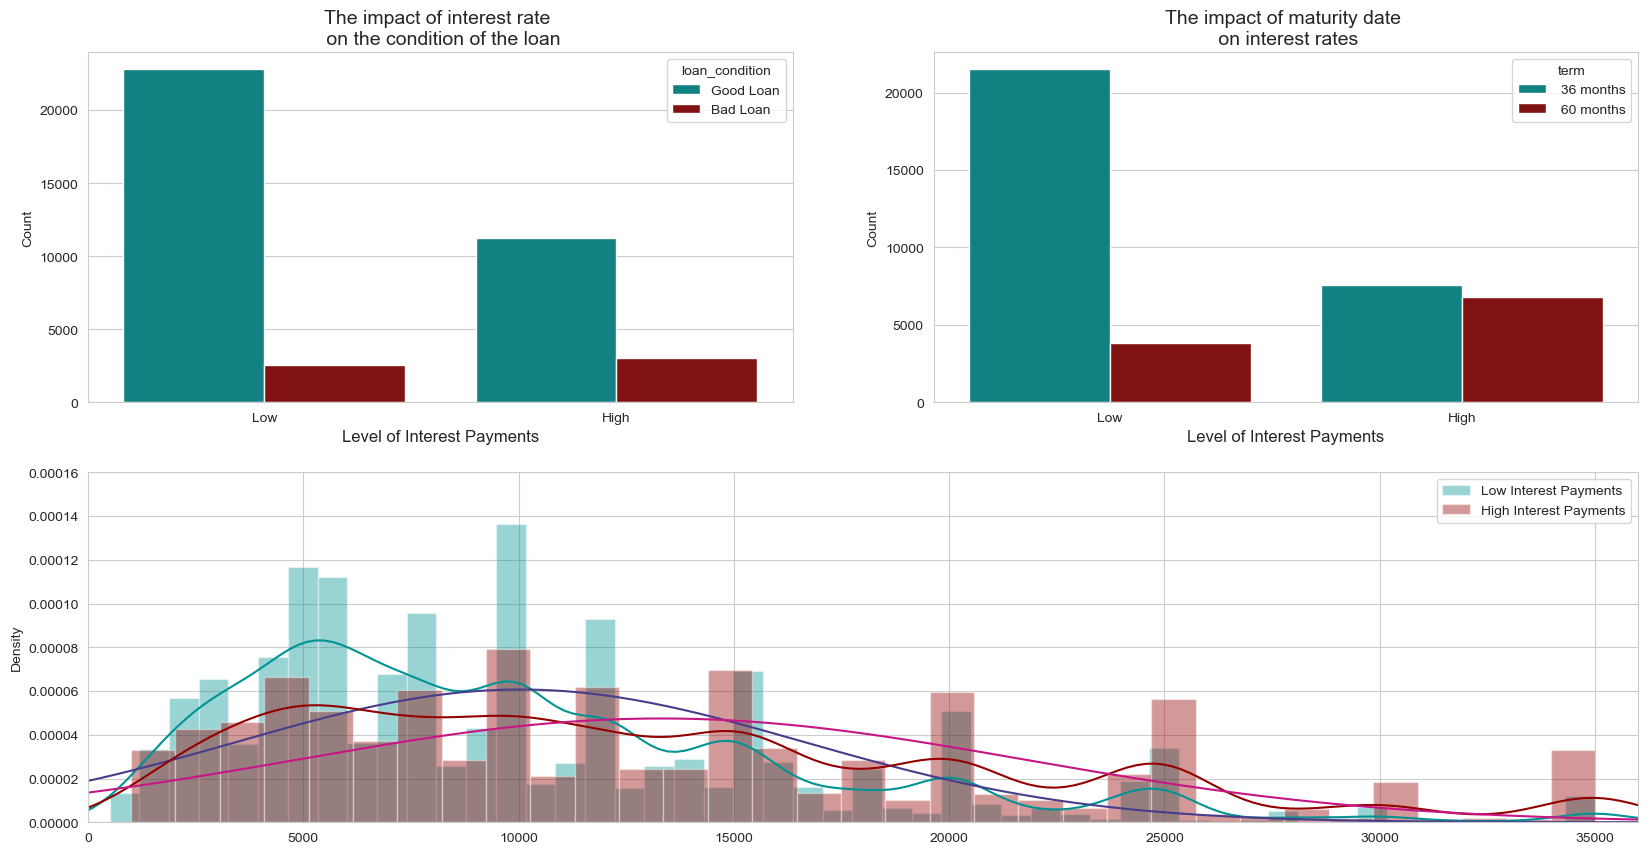

In [165]:
from scipy.stats import norm

plt.figure(figsize=(20,10))

palette = ['#009393', '#930000']
plt.subplot(221)
ax = sns.countplot(x='interest_payments', data=df, 
                  palette=palette, hue='loan_condition')

ax.set_title('The impact of interest rate \n on the condition of the loan', fontsize=14)
ax.set_xlabel('Level of Interest Payments', fontsize=12)
ax.set_ylabel('Count')

plt.subplot(222)
ax1 = sns.countplot(x='interest_payments', data=df, 
                   palette=palette, hue='term')

ax1.set_title('The impact of maturity date \n on interest rates', fontsize=14)
ax1.set_xlabel('Level of Interest Payments', fontsize=12)
ax1.set_ylabel('Count')


plt.subplot(212)
low = df['loan_amount'].loc[df['interest_payments'] == 'Low'].values
high = df['loan_amount'].loc[df['interest_payments'] == 'High'].values


ax2= sns.distplot(low, color='#009393', label='Low Interest Payments', fit=norm, fit_kws={"color":"#483d8b"}) # Dark Blue Norm Color
ax3 = sns.distplot(high, color='#930000', label='High Interest Payments', fit=norm, fit_kws={"color":"#c71585"}) #  Red Norm Color
plt.axis([0, 36000, 0, 0.00016])
plt.legend()


plt.show()

In [166]:
df['purpose'].value_counts()

# Education, renewable energy, wedding are the purposed that contains highest bad loans percent wise.

purpose_condition = round(pd.crosstab(df['loan_condition'], df['purpose']).apply(lambda x: x/x.sum() * 100), 2)

purpose_bad_loans = purpose_condition.values[0].tolist()
purpose_good_loans = purpose_condition.values[1].tolist()
purpose = purpose_condition.columns


bad_plot = go.Bar(
    x=purpose,
    y=purpose_bad_loans,
    name = 'Bad Loans',
    text='%',
    marker=dict(
        color='rgba(219, 64, 82, 0.7)',
        line = dict(
            color='rgba(219, 64, 82, 1.0)',
            width=2
        )
    )
)

good_plot = go.Bar(
    x=purpose,
    y=purpose_good_loans,
    name='Good Loans',
    text='%',
    marker=dict(
        color='rgba(50, 171, 96, 0.7)',
        line = dict(
            color='rgba(50, 171, 96, 1.0)',
            width=2
        )
    )
)


data = [bad_plot, good_plot]

layout = go.Layout(
    title='Condition of Loan by Purpose',
    xaxis=dict(
        title=''
    ),
    yaxis=dict(
        title='% of the Loan',
    ),
    paper_bgcolor='#FFF8DC',
    plot_bgcolor='#FFF8DC',
    showlegend=True
)

fig = dict(data=data, layout=layout)
iplot(fig, filename='condition_purposes')

In [167]:
group_income_purpose = df.groupby(['income_category', 'purpose'], as_index=False).interest_rate.mean()
group_dti_purpose = df.groupby(['income_category', 'purpose'], as_index=False).loan_amount.mean()
loan_a = group_dti_purpose['loan_amount'].values
new_groupby = group_income_purpose.assign(total_loan_amount=loan_a)
sort_group_income_purpose = new_groupby.sort_values(by="income_category", ascending=True)

In [171]:
df.income_category

0           Low
1           Low
2           Low
3           Low
4           Low
          ...  
39712    Medium
39713       Low
39714       Low
39715    Medium
39716       Low
Name: income_category, Length: 39717, dtype: object

In [172]:
df.loan_condition

0        Good Loan
1         Bad Loan
2        Good Loan
3        Good Loan
4        Good Loan
           ...    
39712    Good Loan
39713    Good Loan
39714    Good Loan
39715    Good Loan
39716    Good Loan
Name: loan_condition, Length: 39717, dtype: object

In [175]:
import pandas as pd
import numpy as np

# Calculate loan counts based on income_category and purpose
loan_count = df.groupby(['income_category', 'purpose'])['loan_condition'].value_counts().unstack(fill_value=0)

# Rename columns for clarity
loan_count.columns = ['Bad Loan', 'Good Loan']

# Reset index to create a DataFrame
loan_c_df = loan_count.reset_index()

# Filter Good Loans and Bad Loans
# Assuming 'Good Loan' and 'Bad Loan' are columns in loan_c_df
good_loans = loan_c_df.sort_values(by="income_category", ascending=True)  # Sorting is enough here
bad_loans = loan_c_df.sort_values(by="income_category", ascending=True)  # Sorting is enough here

# Merge good_loans and bad_loans based on income_category
sort_group_income_purpose = pd.merge(good_loans[['income_category', 'purpose', 'Good Loan']],
                                     bad_loans[['income_category', 'purpose', 'Bad Loan']],
                                     on=['income_category', 'purpose'])

# Calculate total loans issued and bad/good ratio (%)
sort_group_income_purpose['total_loans_issued'] = sort_group_income_purpose['Good Loan'] + sort_group_income_purpose['Bad Loan']
sort_group_income_purpose['Risk (%)'] = np.around((sort_group_income_purpose['Bad Loan'] / sort_group_income_purpose['total_loans_issued']) * 100, 2)

# Sort by income_category
final_df = sort_group_income_purpose.sort_values(by='income_category', ascending=True)

# Display DataFrame with styled background gradient
final_df.style.background_gradient('coolwarm')


,income_category,purpose,Good Loan,Bad Loan,total_loans_issued,Risk (%)
0,High,car,12,0,12,0.000000
12,High,major_purchase,31,2,33,6.060000
11,High,credit_card,54,7,61,11.480000
10,High,debt_consolidation,193,19,212,8.960000
8,High,home_improvement,102,10,112,8.930000
7,High,house,11,1,12,8.330000
9,High,educational,1,1,2,50.000000
5,High,medical,16,0,16,0.000000
4,High,moving,6,2,8,25.000000
3,High,renewable_energy,2,1,3,33.330000


In [2]:
import pandas as pd
df=pd.read_csv("loan.csv")

C:\Users\Kave\AppData\Local\Temp\ipykernel_9972\4239846596.py:2: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("loan.csv")


In [3]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=114)

In [4]:
def preprocess(df):
    if df.columns is None:
        df.columns.fillna()
print(df.isnull().sum)
preprocess(df)

<bound method NDFrame._add_numeric_operations.<locals>.sum of           id  member_id  loan_amnt  funded_amnt  funded_amnt_inv   term  \
0      False      False      False        False            False  False   
1      False      False      False        False            False  False   
2      False      False      False        False            False  False   
3      False      False      False        False            False  False   
4      False      False      False        False            False  False   
...      ...        ...        ...          ...              ...    ...   
39712  False      False      False        False            False  False   
39713  False      False      False        False            False  False   
39714  False      False      False        False            False  False   
39715  False      False      False        False            False  False   
39716  False      False      False        False            False  False   

       int_rate  installment  grade  

In [13]:
if df.isnull() is True:
    df=df.fillna
df.isnull()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,False,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,False,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,False,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,False,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,False,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
39713,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
39714,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
39715,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True


In [16]:
def preprocess(df):
    # Check if DataFrame has any NaN columns and fill them
    if df.isnull().any().any():
        # Fill NaN values in each column with appropriate method
        for col in df.columns:
            if df[col].isnull().any():
                if df[col].dtype == 'object':
                    # For object (string) columns, fill NaN with an empty string
                    df[col].fillna('', inplace=True)
                else:
                    # For numeric columns, fill NaN with the mean of the column
                    df[col].fillna(df[col].mean(), inplace=True)
    
    # Print the updated DataFrame to verify changes
    print(df.head())

In [15]:
df.isnull()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,False,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,False,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,False,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,False,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,False,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
39713,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
39714,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
39715,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
